In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
dataset = pd.read_csv("Iris.csv")
dataset
dataset = dataset.drop(columns=['Id'])

In [3]:
dataset.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data_instance = dataset[dataset.columns[:-1]].values

# Standardizing the Data
Standardization transforms the features to have zero mean and unit variance. This step is essential before applying PCA, as it ensures that all features contribute equally to the analysis and prevents features with larger scales from dominating the principal components.

In [7]:
def data_standard(data):
    print(f"Part of Data before Standardization:{data[:10,:]}")
    print(f"Size of Data before standardization:{data.shape}")
    mean=np.mean(data)
    print(f"The Mean of Old Data:{mean:.2f}")

    standard_dev=np.std(data)
    print(f"The Standard Deviation of Old Data:{standard_dev:.2f}")

    standard_data  = (data - mean )/standard_dev

    print(f"Data After Standardization:{standard_data[:,:]}")
    print(f"Size of Data After standardization:{standard_data.shape}")
    new_mean=np.mean(standard_data)
    print(f"Mean of Data After Standardization:{new_mean:.2f}")

    new_std=np.std(standard_data)
    print(f"Standard Deviation of Data After Standardization:{new_std:.2f}")

    return standard_data

st_data=data_standard(data_instance)

Part of Data before Standardization:[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
Size of Data before standardization:(150, 4)
The Mean of Old Data:3.46
The Standard Deviation of Old Data:1.97
Data After Standardization:[[ 0.82894251  0.01840593 -1.04542332 -1.65332575]
 [ 0.72762544 -0.23488675 -1.04542332 -1.65332575]
 [ 0.62630837 -0.13356967 -1.09608186 -1.65332575]
 [ 0.57564983 -0.18422821 -0.99476479 -1.65332575]
 [ 0.77828398  0.06906447 -1.04542332 -1.65332575]
 [ 0.98091812  0.22104008 -0.89344771 -1.55200868]
 [ 0.57564983 -0.0322526  -1.04542332 -1.60266722]
 [ 0.77828398 -0.0322526  -0.99476479 -1.65332575]
 [ 0.47433276 -0.28554528 -1.04542332 -1.65332575]
 [ 0.72762544 -0.18422821 -0.99476479 -1.70398429]
 [ 0.98091812  0.11972301 -0.99476479 -1.65332575]
 [ 0.6769669  -0.0322526  -0.94410625 -1.65332575]
 [ 0.6769669  -0.234886

# Principal Component Analysis (PCA)
PCA is applied to reduce the dimensionality of the dataset while retaining most of the variance. The principal components are extracted and visualized to understand the data structure and feature importance.

In [8]:
def PCA(data,var_toretain):
    
  cov_matrix = np.cov(data, rowvar=False)

  print(f"Covariance Matrix of the standardize data:{cov_matrix}")
  print(f"Size of Covariance Matrix of the standardize data:{cov_matrix.shape}")

  eigen_val, eigen_vec=np.linalg.eigh(cov_matrix)
  print(f"Eigen Values of the Covariance Matrix:{eigen_val}")
  print(f"Corresponding Eigen Vectors of the Covariance Matrix:{eigen_vec}")

  index = np.argsort(eigen_val)[::-1]
  sorted_eigenval,sorted_eigenvec=eigen_val[index],eigen_vec[:,index]
  print(f"Eigen Values in Decreasing Order:{sorted_eigenval}")
  print(f"Eigen Vectors in corresponding to decreasing eigen values:{sorted_eigenvec}")
  print(f"Size of Eigen Vectors{sorted_eigenvec.shape}")

  variance_explained = np.cumsum(sorted_eigenval) / np.sum(sorted_eigenval)
  num_components = np.argmax(variance_explained >= var_toretain) + 1

  principal_components=sorted_eigenvec[:num_components]
  print(f"Principal components retained are:{principal_components}")
  print(f"Size of Principal Components{principal_components.shape}")

  reduced_data=np.matmul(principal_components,data.T)
  print(f"Size of Reduced Data:{reduced_data.shape}")

  return reduced_data, principal_components, sorted_eigenval

In [9]:
DataReduced, pc1, eg2=PCA(st_data, .95)

Covariance Matrix of the standardize data:[[ 0.17596865 -0.01007741  0.32686347  0.13265237]
 [-0.01007741  0.04824723 -0.08256073 -0.03027737]
 [ 0.32686347 -0.08256073  0.79893127  0.33269027]
 [ 0.13265237 -0.03027737  0.33269027  0.14946425]]
Size of Covariance Matrix of the standardize data:(4, 4)
Eigen Values of the Covariance Matrix:[0.00607775 0.02015149 0.06216666 1.08421551]
Corresponding Eigen Vectors of the Covariance Matrix:[[ 0.31725455  0.58099728  0.65653988 -0.36158968]
 [-0.32409435 -0.59641809  0.72971237  0.08226889]
 [-0.47971899 -0.07252408 -0.1757674  -0.85657211]
 [ 0.75112056 -0.54906091 -0.07470647 -0.35884393]]
Eigen Values in Decreasing Order:[1.08421551 0.06216666 0.02015149 0.00607775]
Eigen Vectors in corresponding to decreasing eigen values:[[-0.36158968  0.65653988  0.58099728  0.31725455]
 [ 0.08226889  0.72971237 -0.59641809 -0.32409435]
 [-0.85657211 -0.1757674  -0.07252408 -0.47971899]
 [-0.35884393 -0.07470647 -0.54906091  0.75112056]]
Size of Eige

# Interpreting PCA Results from Graphs
The graphs show how much variance is explained by each principal component. By examining the scree plot and the scatter plots of the transformed data, we can identify which components capture the most information and how well the data separates along these new axes.

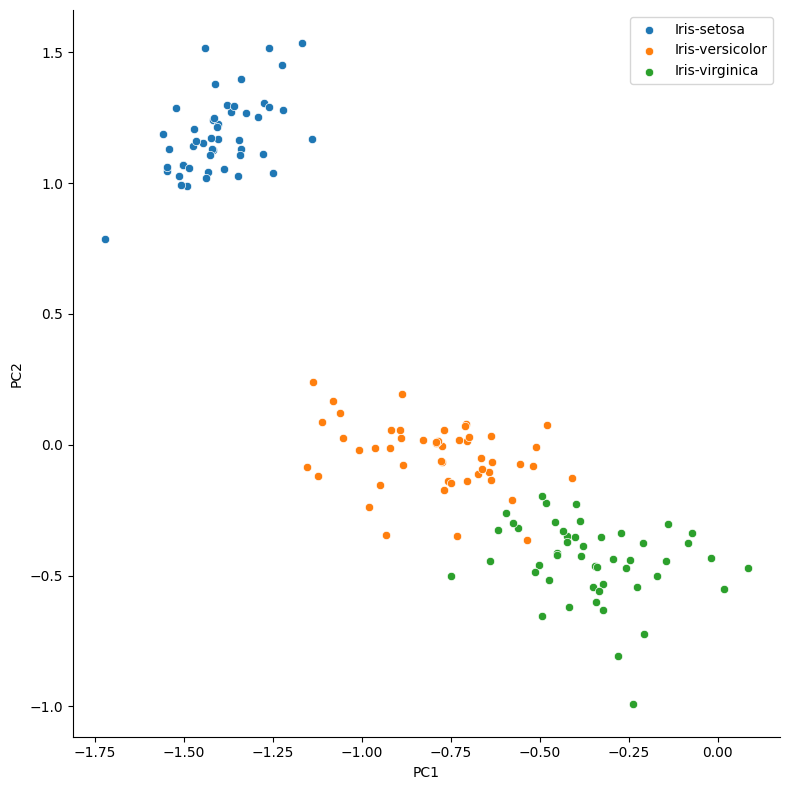

In [10]:
target= dataset['Species']

Transformed_data = np.vstack((DataReduced , target)).T


df = pd.DataFrame(Transformed_data, columns=['PC1' , "PC2" , "labels"])

sns.FacetGrid(data = df , hue="labels", height= 8 ).map(sns.scatterplot , "PC1" , "PC2")
plt.legend()
plt.show()

In [11]:
#Slicing last two features from Iris dataset
new_data=dataset[dataset.columns[:-3]].values
print(f"Part of Iris Dataset with First 2 features:\n{new_data[:,:]}")

Part of Iris Dataset with First 2 features:
[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.1]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]

In [12]:
st1=data_standard(new_data)
#Calling PCA function
DataSetReduced, pri_comp, sorted_eigenVal=PCA(st1,.95)

Part of Data before Standardization:[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]]
Size of Data before standardization:(150, 2)
The Mean of Old Data:4.45
The Standard Deviation of Old Data:1.54
Data After Standardization:[[ 0.42228262 -0.61505441]
 [ 0.29261549 -0.93922224]
 [ 0.16294836 -0.80955511]
 [ 0.09811479 -0.87438867]
 [ 0.35744905 -0.55022085]
 [ 0.61678331 -0.35572016]
 [ 0.09811479 -0.67988798]
 [ 0.35744905 -0.67988798]
 [-0.03155233 -1.0040558 ]
 [ 0.29261549 -0.87438867]
 [ 0.61678331 -0.48538729]
 [ 0.22778192 -0.67988798]
 [ 0.22778192 -0.93922224]
 [-0.0963859  -0.93922224]
 [ 0.87611757 -0.29088659]
 [ 0.811284   -0.03155233]
 [ 0.61678331 -0.35572016]
 [ 0.42228262 -0.61505441]
 [ 0.811284   -0.42055372]
 [ 0.42228262 -0.42055372]
 [ 0.61678331 -0.67988798]
 [ 0.42228262 -0.48538729]
 [ 0.09811479 -0.55022085]
 [ 0.42228262 -0.74472154]
 [ 0.22778192 -0.67988798]
 [ 0.35744905 -0.93922224]
 [ 0.35744905

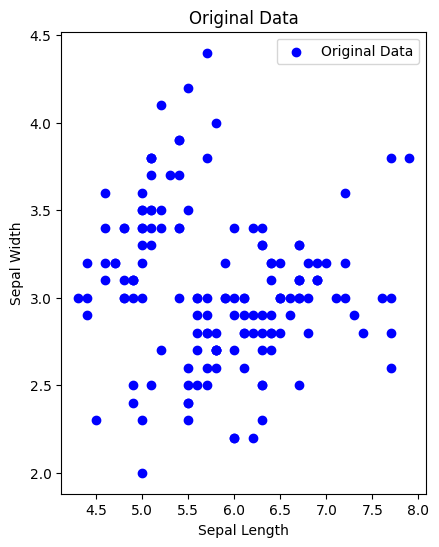

In [13]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
plt.scatter(data_instance[:, 0], data_instance[:, 1], c='blue', label='Original Data')
plt.title('Original Data')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

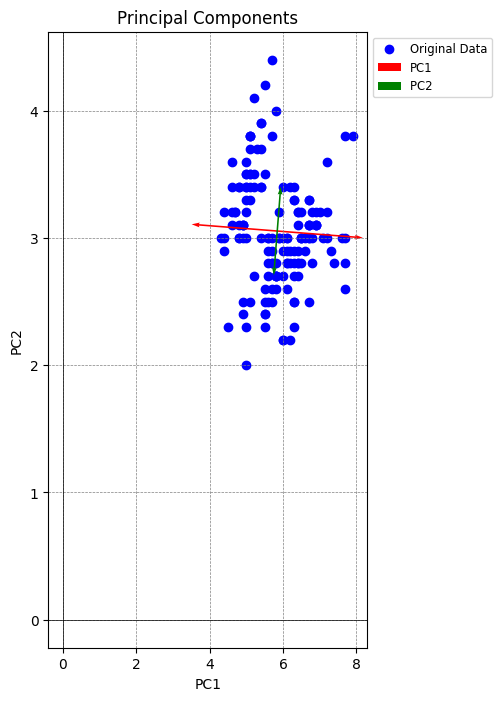

In [14]:
plt.figure(figsize=(14, 8))
plt.subplot(1, 3, 1)
plt.scatter(data_instance[:, 0], data_instance[:, 1], c='blue', label='Original Data')
mean = np.mean(data_instance, axis=0)

origin = mean[:2]  # Origin is the mean of the data for the first 2 features
pc1 = pri_comp[:, 0] * np.sqrt(sorted_eigenVal[0])
pc2 = pri_comp[:, 1] * np.sqrt(sorted_eigenVal[1])

plt.quiver(origin[0], origin[1], pc1[0], pc1[1], color='r', scale=2, label="PC1", width=0.005)
plt.quiver(origin[0], origin[1], -pc1[0], -pc1[1], color='r', scale=2, label="", width=0.005)
plt.quiver(origin[0], origin[1], pc2[0], pc2[1], color='g', scale=2, label="", width=0.005)
plt.quiver(origin[0], origin[1], -pc2[0], -pc2[1], color='g', scale=2, label="PC2 ", width=0.005)

plt.title('Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.show()

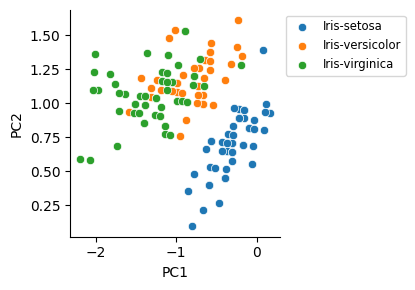

In [15]:
#Adding the Label Columns to the transformed data
Transformed_data1 = np.vstack((DataSetReduced, target)).T

df = pd.DataFrame(Transformed_data1, columns=['PC1' , "PC2" , "labels"])

sns.FacetGrid(data = df , hue="labels" ).map(sns.scatterplot , "PC1" , "PC2")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.show()

In [16]:
def percentage_var(EigenVal):
    percentage_variance=(EigenVal/(np.sum(EigenVal)))*100
    print(f"Percentage Variance Captured by the PC's are:{percentage_variance}")
    return percentage_variance
#Calling the function percentage_var
percentage_variance=percentage_var(sorted_eigenVal)

Percentage Variance Captured by the PC's are:[78.83423842 21.16576158]


In [17]:
def MSE(EigenVal, data):
    minmsqu_error=(np.sum(EigenVal)-EigenVal[0])/data.shape[0]
    print(f"Minimum Squared Error when only retaining the 1st PC is:{minmsqu_error:.4f}")
    return minmsqu_error
#Calling the function MSE
minimum_squared_error=MSE(sorted_eigenVal, new_data)

Minimum Squared Error when only retaining the 1st PC is:0.0005
